# 📊 GenZ Financial Profile Dashboard Analysis

**Competition Goal:** Create fresh, insightful, and feasible dashboard visualizations

**Dataset:** `dataset_gelarrasa_genzfinancialprofile.csv`

**Focus Columns:**
- `avg_monthly_income`
- `avg_income_category`
- `avg_monthly_expense`
- `avg_expense_category`
- `financial_standing`

---

## 📋 Table of Contents
1. [Environment Setup](#setup)
2. [Data Loading & Exploration](#exploration)
3. [Primary Visualization: Income vs Expense Categories](#primary-viz)
4. [Alternative Visualization Ideas](#alternative-viz)
5. [Summary & Next Steps](#summary)

---
## 1. Environment Setup <a id='setup'></a>

**Purpose:** Import all necessary libraries for data manipulation and visualization.

**Libraries Used:**
- `pandas`: Data manipulation and analysis
- `matplotlib`: Static plotting
- `seaborn`: Statistical data visualization
- `plotly`: Interactive visualizations
- `numpy`: Numerical operations

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for matplotlib/seaborn
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ All libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 Matplotlib version: {plt.matplotlib.__version__}")
print(f"📦 Seaborn version: {sns.__version__}")

✅ All libraries imported successfully!
📦 Pandas version: 2.2.3
📦 Matplotlib version: 3.10.0
📦 Seaborn version: 0.13.2


---
## 2. Data Loading & Exploration <a id='exploration'></a>

**Purpose:** Load the dataset and perform initial exploration to understand:
- Data structure and shape
- Column data types
- Missing values
- Category distributions
- Statistical summaries

In [2]:
# Load the dataset
file_path = 'dataset_gelarrasa_genzfinancialprofile.csv'
df = pd.read_csv(file_path)

print(f"✅ Dataset loaded successfully!")
print(f"📊 Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

✅ Dataset loaded successfully!
📊 Dataset shape: 1000 rows × 18 columns


In [3]:
# Display first few rows
print("\n🔍 First 5 rows of the dataset:")
df.head()


🔍 First 5 rows of the dataset:


,user_id ID,birth_year,gender,province,education_level,employment_status,avg_monthly_income,avg_income_category,avg_monthly_expense,avg_expense_category,financial_standing,main_fintech_app,ewallet_spending,investment_type,loan_usage_purpose,outstanding_loan,financial_anxiety_score,digital_time_spent_per_day
0,U0003,2011,Female,Sulawesi Selatan,Bachelor (S1)/Diploma IV,Student,Rp2.000.001 - Rp4.000.000,2-4jt,Rp4.000.001 - Rp6.000.000,4-6jt,Deficit,OVO,Rp500.001 - Rp1.000.000,Reksadana,Tidak Ada,0.0,5,7.5
1,U0009,2002,Female,Sumatera Utara,Junior High School,Private Employee,Rp6.000.001 - Rp10.000.000,6-10jt,Rp10.000.001 - Rp15.000.000,10-15jt,Deficit,LinkAja,< Rp500.000,Reksadana,Tidak Ada,0.0,2,10.4
2,U0011,2001,Male,Maluku Utara,Elementary School,Private Employee,Rp2.000.001 - Rp4.000.000,2-4jt,Rp4.000.001 - Rp6.000.000,4-6jt,Deficit,LinkAja,< Rp500.000,Emas,Tidak Ada,0.0,5,20.0
3,U0012,2012,Female,Banten,Junior High School,Student,Rp4.000.001 - Rp6.000.000,4-6jt,Rp4.000.001 - Rp6.000.000,4-6jt,Break-even,LinkAja,Rp500.001 - Rp1.000.000,Reksadana,Tidak Ada,0.0,4,4.9
4,U0013,2012,Female,Nusa Tenggara Barat,Bachelor (S1)/Diploma IV,Student,Rp4.000.001 - Rp6.000.000,4-6jt,Rp4.000.001 - Rp6.000.000,4-6jt,Break-even,OVO,Rp500.001 - Rp1.000.000,Kripto,Tidak Ada,0.0,2,4.1


In [4]:
# Check data types and missing values
print("\n📋 Dataset Information:")
df.info()


📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id ID                  1000 non-null   object 
 1   birth_year                  1000 non-null   int64  
 2   gender                      1000 non-null   object 
 3   province                    1000 non-null   object 
 4   education_level             1000 non-null   object 
 5   employment_status           1000 non-null   object 
 6   avg_monthly_income          967 non-null    object 
 7   avg_income_category         967 non-null    object 
 8   avg_monthly_expense         973 non-null    object 
 9   avg_expense_category        973 non-null    object 
 10  financial_standing          1000 non-null   object 
 11  main_fintech_app            1000 non-null   object 
 12  ewallet_spending            1000 non-null   object 
 13  investment

In [5]:
# Missing values analysis
print("\n🔍 Missing Values Analysis:")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    display(missing_data)
else:
    print("✅ No missing values found!")


🔍 Missing Values Analysis:


,Column,Missing_Count,Missing_Percentage
investment_type,investment_type,119,11.9
avg_income_category,avg_income_category,33,3.3
avg_monthly_income,avg_monthly_income,33,3.3
outstanding_loan,outstanding_loan,30,3.0
loan_usage_purpose,loan_usage_purpose,30,3.0
avg_monthly_expense,avg_monthly_expense,27,2.7
avg_expense_category,avg_expense_category,27,2.7


In [6]:
# Focus on our key columns
key_columns = ['avg_monthly_income', 'avg_income_category', 'avg_monthly_expense', 
               'avg_expense_category', 'financial_standing']

print("\n🎯 Key Columns Analysis:")
df[key_columns].head(10)


🎯 Key Columns Analysis:


,avg_monthly_income,avg_income_category,avg_monthly_expense,avg_expense_category,financial_standing
0,Rp2.000.001 - Rp4.000.000,2-4jt,Rp4.000.001 - Rp6.000.000,4-6jt,Deficit
1,Rp6.000.001 - Rp10.000.000,6-10jt,Rp10.000.001 - Rp15.000.000,10-15jt,Deficit
2,Rp2.000.001 - Rp4.000.000,2-4jt,Rp4.000.001 - Rp6.000.000,4-6jt,Deficit
3,Rp4.000.001 - Rp6.000.000,4-6jt,Rp4.000.001 - Rp6.000.000,4-6jt,Break-even
4,Rp4.000.001 - Rp6.000.000,4-6jt,Rp4.000.001 - Rp6.000.000,4-6jt,Break-even
5,Rp2.000.001 - Rp4.000.000,2-4jt,Rp4.000.001 - Rp6.000.000,4-6jt,Deficit
6,NaN,NaN,< Rp2.000.000,<2jt,Deficit
7,Rp6.000.001 - Rp10.000.000,6-10jt,Rp10.000.001 - Rp15.000.000,10-15jt,Deficit
8,Rp2.000.001 - Rp4.000.000,2-4jt,Rp4.000.001 - Rp6.000.000,4-6jt,Deficit
9,< Rp2.000.000,<2jt,< Rp2.000.000,<2jt,Break-even


In [7]:
# Statistical summary for numerical columns
print("\n📊 Statistical Summary:")
df[['avg_monthly_income', 'avg_monthly_expense']].describe()


📊 Statistical Summary:


,avg_monthly_income,avg_monthly_expense
count,967,973
unique,6,6
top,< Rp2.000.000,Rp4.000.001 - Rp6.000.000
freq,338,379


In [8]:
# Analyze category distributions
print("\n📈 Income Category Distribution:")
print(df['avg_income_category'].value_counts().sort_index())
print(f"\nTotal: {df['avg_income_category'].value_counts().sum()}")

print("\n📈 Expense Category Distribution:")
print(df['avg_expense_category'].value_counts().sort_index())
print(f"\nTotal: {df['avg_expense_category'].value_counts().sum()}")

print("\n💰 Financial Standing Distribution:")
print(df['financial_standing'].value_counts())


📈 Income Category Distribution:
avg_income_category
10-15jt     66
2-4jt      215
4-6jt      163
6-10jt     148
<2jt       338
>15jt       37
Name: count, dtype: int64

Total: 967

📈 Expense Category Distribution:
avg_expense_category
10-15jt    146
2-4jt        5
4-6jt      379
6-10jt      69
<2jt       337
>15jt       37
Name: count, dtype: int64

Total: 973

💰 Financial Standing Distribution:
financial_standing
Break-even    516
Deficit       387
Surplus        97
Name: count, dtype: int64


### 📝 Data Quality Notes

**Key Observations:**
- Check if income/expense categories follow the expected order: N/A, <2jt, 2-4jt, 4-6jt, 6-10jt, 10-15jt, >15jt
- Identify any data cleaning needs (missing values, inconsistent categories, outliers)
- Note the distribution balance across categories

In [22]:
# Define proper category order for visualization
# This ensures categories appear in logical order (low to high income/expense)
category_order = ['N/A', '<2jt', '2-4jt', '4-6jt', '6-10jt', '10-15jt', '>15jt']

# Check which categories exist in the data
# Filter out NaN values before sorting to avoid comparison errors
income_cats = df['avg_income_category'].dropna().unique()
expense_cats = df['avg_expense_category'].dropna().unique()

print("🔍 Unique Income Categories:")
print(sorted(income_cats))
print("\n🔍 Unique Expense Categories:")
print(sorted(expense_cats))

# Check if there are any NaN values in the data
income_na_count = df['avg_income_category'].isna().sum()
expense_na_count = df['avg_expense_category'].isna().sum()

if income_na_count > 0 or expense_na_count > 0:
    print(f"\n⚠️ Note: Found {income_na_count} NaN values in income categories and {expense_na_count} in expense categories")
    print("   These will be filtered out in visualizations.")


🔍 Unique Income Categories:
['10-15jt', '2-4jt', '4-6jt', '6-10jt', '<2jt', '>15jt']

🔍 Unique Expense Categories:
['10-15jt', '2-4jt', '4-6jt', '6-10jt', '<2jt', '>15jt']

⚠️ Note: Found 33 NaN values in income categories and 27 in expense categories
   These will be filtered out in visualizations.


---
## 3. Primary Visualization: Income vs Expense Categories <a id='primary-viz'></a>

**Objective:** Create a grouped/stacked bar chart comparing income vs expense distribution by category.

**Why This Works:**
- Shows clear comparison between income and expense patterns
- Percentage normalization makes categories comparable
- Reveals spending behavior relative to income levels
- Easy to interpret for competition judges

**Approach:** We'll create multiple versions to explore different insights.

### 3.1 Data Preparation for Primary Visualization

In [23]:
# Calculate frequency counts for income and expense categories
income_counts = df['avg_income_category'].value_counts()
expense_counts = df['avg_expense_category'].value_counts()

# Calculate percentages
income_pct = (income_counts / income_counts.sum() * 100).round(2)
expense_pct = (expense_counts / expense_counts.sum() * 100).round(2)

# Create a combined dataframe for visualization
viz_data = pd.DataFrame({
    'Income_Count': income_counts,
    'Income_Percentage': income_pct,
    'Expense_Count': expense_counts,
    'Expense_Percentage': expense_pct
}).fillna(0)

# Reindex to ensure proper category order
existing_categories = [cat for cat in category_order if cat in viz_data.index]
viz_data = viz_data.reindex(existing_categories)

print("📊 Prepared Visualization Data:")
display(viz_data)

📊 Prepared Visualization Data:


,Income_Count,Income_Percentage,Expense_Count,Expense_Percentage
<2jt,338,34.95,337,34.64
2-4jt,215,22.23,5,0.51
4-6jt,163,16.86,379,38.95
6-10jt,148,15.31,69,7.09
10-15jt,66,6.83,146,15.01
>15jt,37,3.83,37,3.80


### 3.2 Version 1: Grouped Bar Chart (Side-by-Side Comparison)

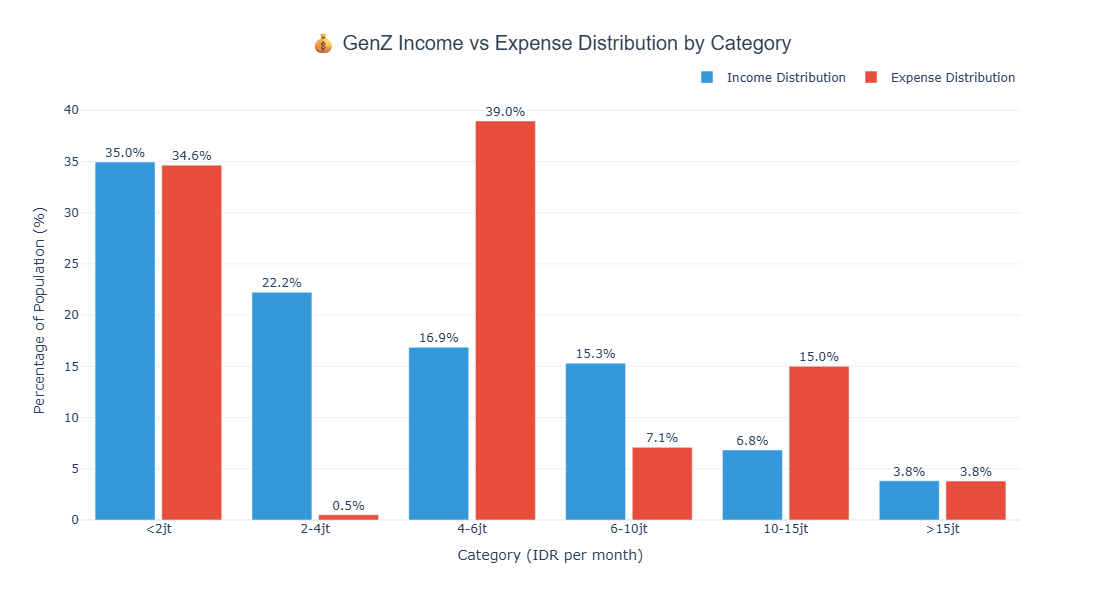


✅ Grouped Bar Chart created successfully!

💡 Insight: Compare the heights of blue (income) vs red (expense) bars.
   - Similar heights = balanced distribution
   - Higher expense bars = more people spend in that range than earn
   - Look for patterns: Do people spend less than they earn?


In [24]:
# Create grouped bar chart with Plotly
fig = go.Figure()

# Add Income bars
fig.add_trace(go.Bar(
    name='Income Distribution',
    x=viz_data.index,
    y=viz_data['Income_Percentage'],
    text=viz_data['Income_Percentage'].round(1).astype(str) + '%',
    textposition='outside',
    marker_color='#3498db',
    hovertemplate='<b>Income Category: %{x}</b><br>Percentage: %{y:.1f}%<br>Count: ' + 
                  viz_data['Income_Count'].astype(str) + '<extra></extra>'
))

# Add Expense bars
fig.add_trace(go.Bar(
    name='Expense Distribution',
    x=viz_data.index,
    y=viz_data['Expense_Percentage'],
    text=viz_data['Expense_Percentage'].round(1).astype(str) + '%',
    textposition='outside',
    marker_color='#e74c3c',
    hovertemplate='<b>Expense Category: %{x}</b><br>Percentage: %{y:.1f}%<br>Count: ' + 
                  viz_data['Expense_Count'].astype(str) + '<extra></extra>'
))

# Update layout
fig.update_layout(
    title={
        'text': '💰 GenZ Income vs Expense Distribution by Category',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial, sans-serif', 'color': '#2c3e50'}
    },
    xaxis={
        'title': 'Category (IDR per month)',
        'title_font': {'size': 14},
        'tickfont': {'size': 12}
    },
    yaxis={
        'title': 'Percentage of Population (%)',
        'title_font': {'size': 14},
        'tickfont': {'size': 12}
    },
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    template='plotly_white',
    hovermode='x unified',
    legend={
        'orientation': 'h',
        'yanchor': 'bottom',
        'y': 1.02,
        'xanchor': 'right',
        'x': 1,
        'font': {'size': 12}
    },
    height=600,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='white'
)

fig.show()

print("\n✅ Grouped Bar Chart created successfully!")
print("\n💡 Insight: Compare the heights of blue (income) vs red (expense) bars.")
print("   - Similar heights = balanced distribution")
print("   - Higher expense bars = more people spend in that range than earn")
print("   - Look for patterns: Do people spend less than they earn?")

### 3.3 Version 2: Stacked Percentage Bar Chart (100% Normalized)

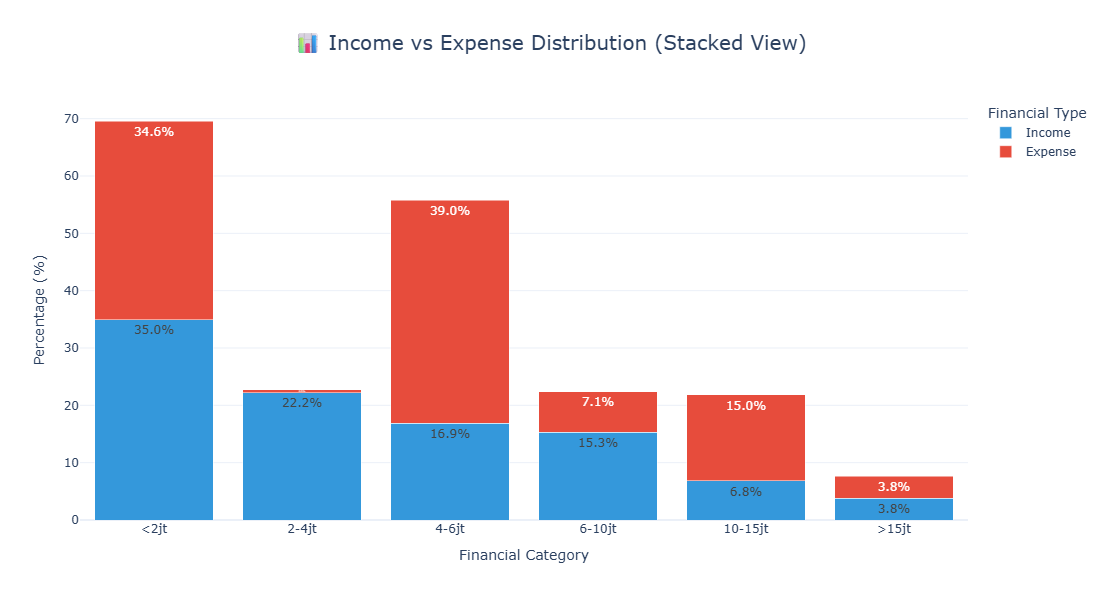


✅ Stacked Bar Chart created successfully!

💡 Use Case: Shows total financial activity per category.


In [25]:
# Prepare data in long format for stacked chart
stacked_data = []
for category in viz_data.index:
    stacked_data.append({
        'Category': category,
        'Type': 'Income',
        'Percentage': viz_data.loc[category, 'Income_Percentage'],
        'Count': viz_data.loc[category, 'Income_Count']
    })
    stacked_data.append({
        'Category': category,
        'Type': 'Expense',
        'Percentage': viz_data.loc[category, 'Expense_Percentage'],
        'Count': viz_data.loc[category, 'Expense_Count']
    })

stacked_df = pd.DataFrame(stacked_data)

# Create stacked bar chart
fig = px.bar(
    stacked_df,
    x='Category',
    y='Percentage',
    color='Type',
    title='📊 Income vs Expense Distribution (Stacked View)',
    labels={'Percentage': 'Percentage (%)', 'Category': 'Financial Category'},
    color_discrete_map={'Income': '#3498db', 'Expense': '#e74c3c'},
    text='Percentage',
    hover_data={'Count': True}
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig.update_layout(
    barmode='stack',
    height=600,
    template='plotly_white',
    title_x=0.5,
    title_font_size=20,
    legend_title_text='Financial Type'
)

fig.show()

print("\n✅ Stacked Bar Chart created successfully!")
print("\n💡 Use Case: Shows total financial activity per category.")

### 3.4 Version 3: Diverging Bar Chart (Income-Expense Comparison)

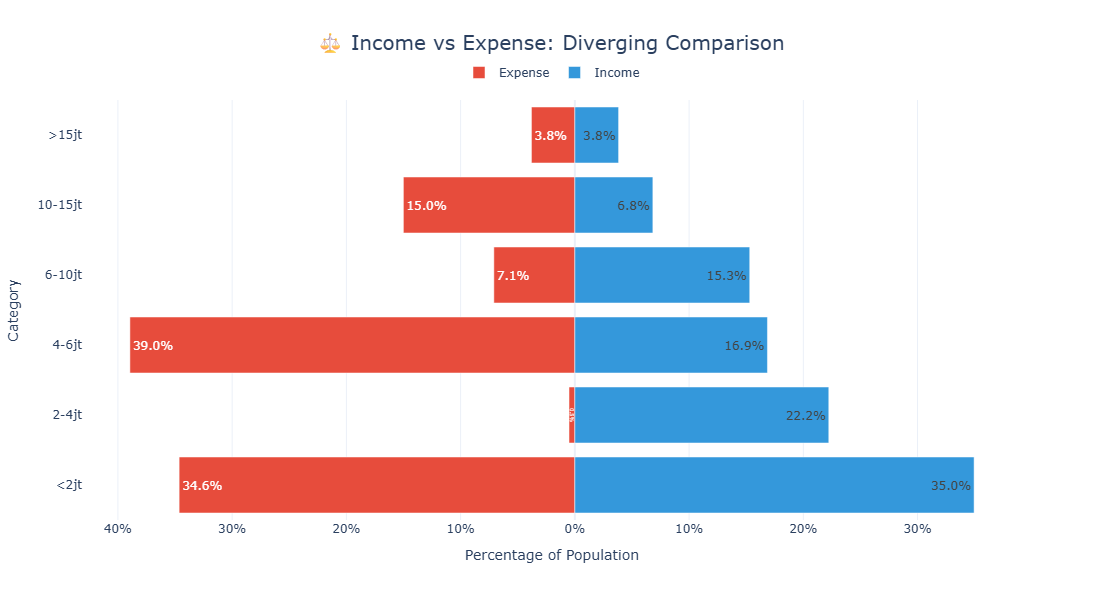


✅ Diverging Bar Chart created successfully!

💡 Insight: Symmetry shows balance. If bars extend further on one side,
   it indicates where most people earn vs spend.


In [26]:
# Create diverging chart (expenses on left, income on right)
fig = go.Figure()

# Add Expense bars (negative values for left side)
fig.add_trace(go.Bar(
    name='Expense',
    y=viz_data.index,
    x=-viz_data['Expense_Percentage'],
    orientation='h',
    marker_color='#e74c3c',
    text=viz_data['Expense_Percentage'].round(1).astype(str) + '%',
    textposition='inside',
    hovertemplate='<b>%{y}</b><br>Expense: %{x:.1f}%<extra></extra>'
))

# Add Income bars (positive values for right side)
fig.add_trace(go.Bar(
    name='Income',
    y=viz_data.index,
    x=viz_data['Income_Percentage'],
    orientation='h',
    marker_color='#3498db',
    text=viz_data['Income_Percentage'].round(1).astype(str) + '%',
    textposition='inside',
    hovertemplate='<b>%{y}</b><br>Income: %{x:.1f}%<extra></extra>'
))

fig.update_layout(
    title={
        'text': '⚖️ Income vs Expense: Diverging Comparison',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    },
    barmode='overlay',
    xaxis={
        'title': 'Percentage of Population',
        'tickvals': [-40, -30, -20, -10, 0, 10, 20, 30, 40],
        'ticktext': ['40%', '30%', '20%', '10%', '0%', '10%', '20%', '30%', '40%']
    },
    yaxis={'title': 'Category'},
    template='plotly_white',
    height=600,
    showlegend=True,
    legend=dict(orientation='h', y=1.1, x=0.5, xanchor='center')
)

fig.show()

print("\n✅ Diverging Bar Chart created successfully!")
print("\n💡 Insight: Symmetry shows balance. If bars extend further on one side,")
print("   it indicates where most people earn vs spend.")

### 3.5 Key Insights from Primary Visualization

**Questions to Answer:**
1. What are the most common income categories?
2. What are the most common expense categories?
3. Do people tend to spend less than they earn?
4. Are there mismatches (e.g., low income but high expenses)?
5. Which visualization style tells the story best?

In [27]:
# Calculate key metrics
print("📊 KEY METRICS:")
print("=" * 60)

# Most common categories
print(f"\n💰 Most common income category: {income_counts.idxmax()} ({income_pct.max():.1f}%)")
print(f"💸 Most common expense category: {expense_counts.idxmax()} ({expense_pct.max():.1f}%)")

# Category matching analysis
same_category = (df['avg_income_category'] == df['avg_expense_category']).sum()
same_category_pct = round((same_category / len(df) * 100), 2)
print(f"\n🎯 People with matching income-expense categories: {same_category} ({same_category_pct}%)")

# Financial standing distribution
print("\n💼 Financial Standing Breakdown:")
for standing, count in df['financial_standing'].value_counts().items():
    pct = round((count / len(df) * 100), 1)
    print(f"   {standing}: {count} ({pct}%)")


📊 KEY METRICS:

💰 Most common income category: <2jt (35.0%)
💸 Most common expense category: 4-6jt (39.0%)

🎯 People with matching income-expense categories: 516 (51.6%)

💼 Financial Standing Breakdown:
   Break-even: 516 (51.6%)
   Deficit: 387 (38.7%)
   Surplus: 97 (9.7%)


---
## 4. Alternative Visualization Ideas <a id='alternative-viz'></a>

Beyond the primary income vs expense comparison, here are **3 alternative approaches** that reveal different insights:

1. **Sankey Diagram**: Flow from income to expense categories
2. **Heatmap**: Income-Expense category cross-tabulation
3. **Treemap**: Hierarchical view of financial standing by categories

### 4.1 Alternative #1: Sankey Diagram (Flow Visualization)

**Why Use This:**
- Shows the actual flow from income categories to expense categories
- Reveals spending patterns per income group
- Highly visual and impressive for competitions
- Answers: "Where does money flow?"

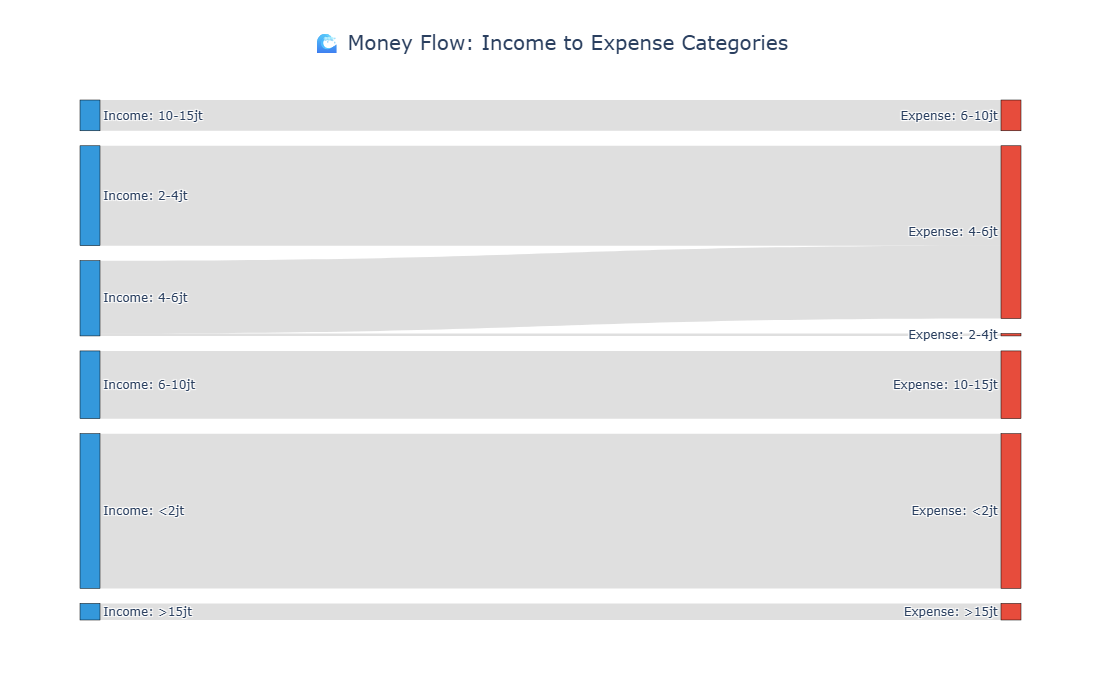


✅ Sankey Diagram created successfully!

💡 How to Read:
   - Left side (blue) = Income categories
   - Right side (red) = Expense categories
   - Flow width = Number of people in that income-expense combination
   - Look for mismatches: Do high earners have low expenses (savings)?


In [28]:
# Prepare data for Sankey diagram
# Create cross-tabulation of income and expense categories
flow_data = df.groupby(['avg_income_category', 'avg_expense_category']).size().reset_index(name='count')

# Create unique labels for source (income) and target (expense)
income_labels = [f"Income: {cat}" for cat in flow_data['avg_income_category'].unique()]
expense_labels = [f"Expense: {cat}" for cat in flow_data['avg_expense_category'].unique()]
all_labels = income_labels + expense_labels

# Create mapping dictionaries
income_map = {cat: idx for idx, cat in enumerate(flow_data['avg_income_category'].unique())}
expense_map = {cat: idx + len(income_map) for idx, cat in enumerate(flow_data['avg_expense_category'].unique())}

# Create source, target, and value lists
sources = [income_map[row['avg_income_category']] for _, row in flow_data.iterrows()]
targets = [expense_map[row['avg_expense_category']] for _, row in flow_data.iterrows()]
values = flow_data['count'].tolist()

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color=['#3498db'] * len(income_map) + ['#e74c3c'] * len(expense_map)
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color='rgba(150, 150, 150, 0.3)'
    )
)])

fig.update_layout(
    title={
        'text': '🌊 Money Flow: Income to Expense Categories',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    },
    font=dict(size=12),
    height=700,
    plot_bgcolor='white'
)

fig.show()

print("\n✅ Sankey Diagram created successfully!")
print("\n💡 How to Read:")
print("   - Left side (blue) = Income categories")
print("   - Right side (red) = Expense categories")
print("   - Flow width = Number of people in that income-expense combination")
print("   - Look for mismatches: Do high earners have low expenses (savings)?")

### 4.2 Alternative #2: Heatmap (Cross-Category Analysis)

**Why Use This:**
- Shows density/concentration of income-expense combinations
- Identifies common patterns and outliers
- Great for spotting financial health issues
- Answers: "What combinations are most/least common?"

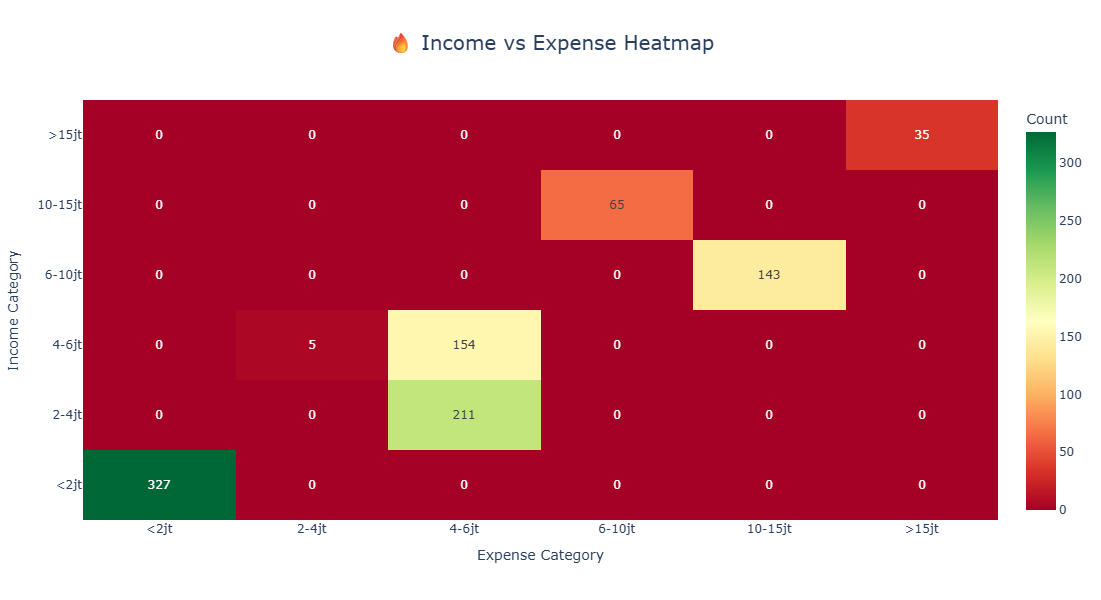


✅ Heatmap created successfully!

💡 Interpretation:
   - Diagonal (same category) = people spending within their means
   - Above diagonal = people spending less than income category (good!)
   - Below diagonal = people spending more than income category (concern!)
   - Darker green = more common combinations


In [29]:
# Create crosstab for heatmap
heatmap_data = pd.crosstab(
    df['avg_income_category'], 
    df['avg_expense_category'],
    margins=False
)

# Reorder both axes according to category_order
existing_income_cats = [cat for cat in category_order if cat in heatmap_data.index]
existing_expense_cats = [cat for cat in category_order if cat in heatmap_data.columns]
heatmap_data = heatmap_data.reindex(index=existing_income_cats, columns=existing_expense_cats, fill_value=0)

# Create interactive heatmap with Plotly
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='RdYlGn',
    text=heatmap_data.values,
    texttemplate='%{text}',
    textfont={"size": 12},
    hovertemplate='Income: %{y}<br>Expense: %{x}<br>Count: %{z}<extra></extra>',
    colorbar=dict(title="Count")
))

fig.update_layout(
    title={
        'text': '🔥 Income vs Expense Heatmap',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    },
    xaxis={'title': 'Expense Category', 'side': 'bottom'},
    yaxis={'title': 'Income Category'},
    height=600,
    template='plotly_white'
)

fig.show()

print("\n✅ Heatmap created successfully!")
print("\n💡 Interpretation:")
print("   - Diagonal (same category) = people spending within their means")
print("   - Above diagonal = people spending less than income category (good!)")
print("   - Below diagonal = people spending more than income category (concern!)")
print("   - Darker green = more common combinations")

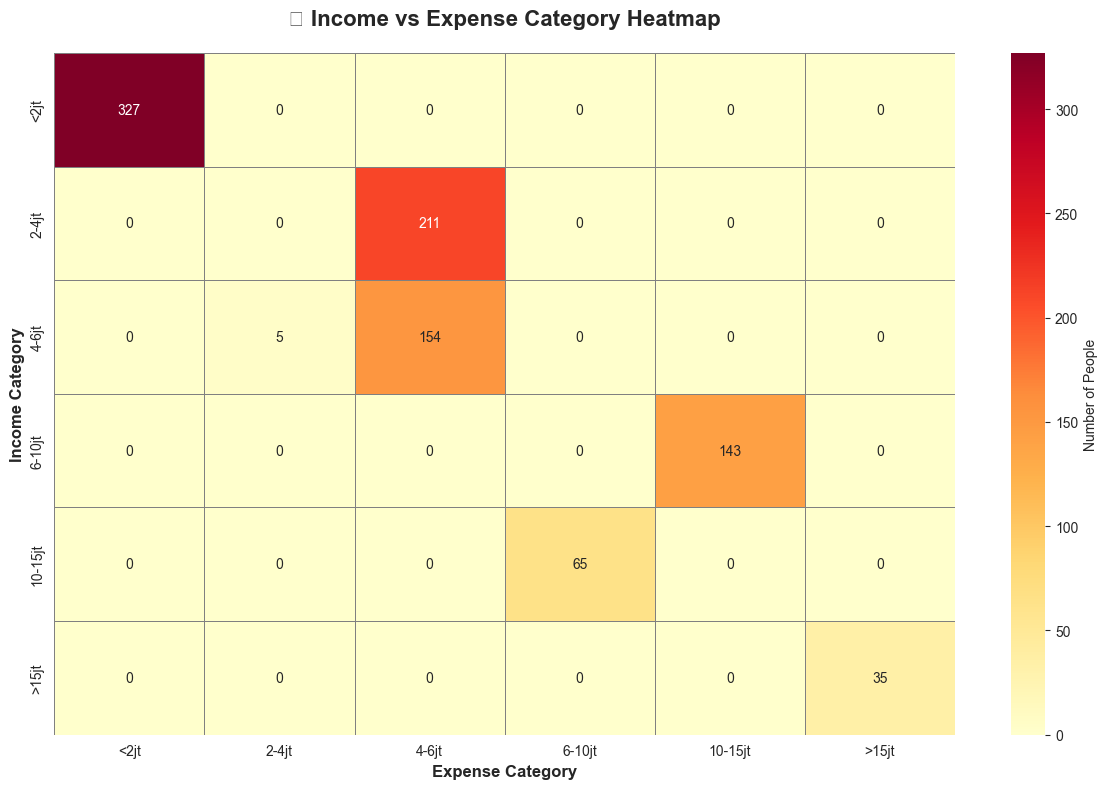


✅ Static heatmap (Seaborn) created!
💡 Use this version for static reports or presentations.


In [30]:
# Alternative: Static heatmap with seaborn (for different aesthetic)
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='d', 
    cmap='YlOrRd',
    cbar_kws={'label': 'Number of People'},
    linewidths=0.5,
    linecolor='gray'
)
plt.title('🔥 Income vs Expense Category Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Expense Category', fontsize=12, fontweight='bold')
plt.ylabel('Income Category', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ Static heatmap (Seaborn) created!")
print("💡 Use this version for static reports or presentations.")

### 4.3 Alternative #3: Treemap (Hierarchical Financial View)

**Why Use This:**
- Shows proportions using area (easy to spot dominance)
- Can hierarchically show: Financial Standing → Income Category → Expense Category
- Visually striking and modern
- Answers: "What's the big picture of financial distribution?"

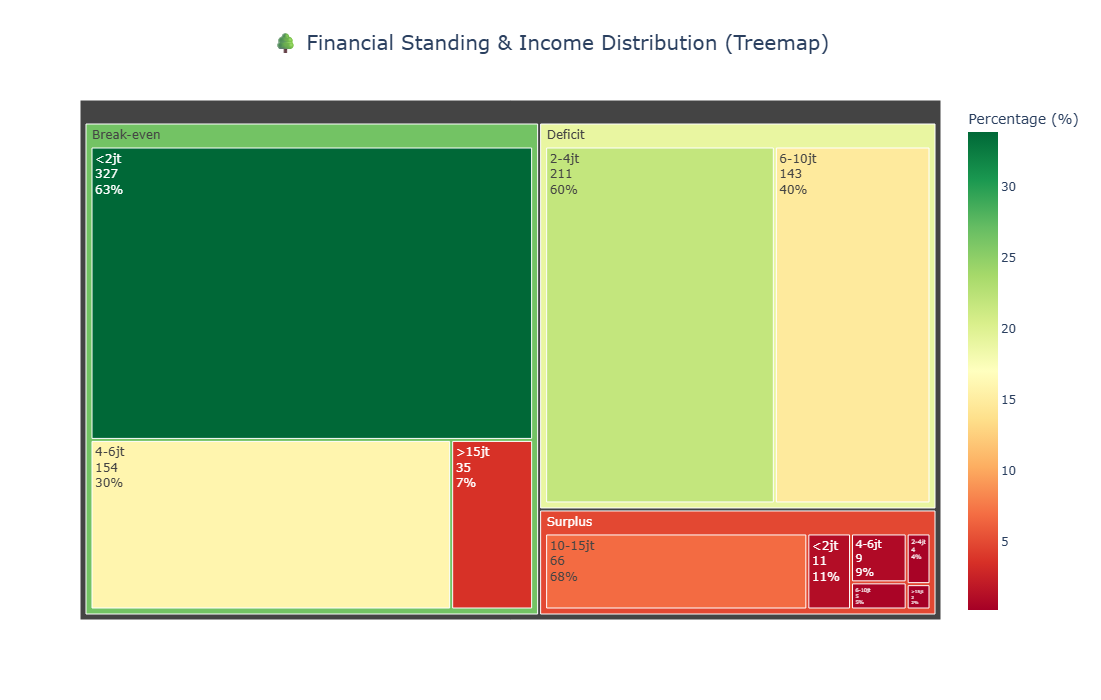


✅ Treemap created successfully!

💡 How to Read:
   - Larger boxes = more people in that category
   - First level = Financial standing (e.g., Surplus, Deficit)
   - Second level = Income categories within each standing
   - Color intensity = percentage of total population


In [31]:
# Prepare hierarchical data for treemap
treemap_data = df.groupby(['financial_standing', 'avg_income_category']).size().reset_index(name='count')
treemap_data['percentage'] = (treemap_data['count'] / treemap_data['count'].sum() * 100).round(2)

# Create treemap
fig = px.treemap(
    treemap_data,
    path=['financial_standing', 'avg_income_category'],
    values='count',
    color='percentage',
    color_continuous_scale='RdYlGn',
    title='🌳 Financial Standing & Income Distribution (Treemap)',
    hover_data={'count': True, 'percentage': ':.2f'}
)

fig.update_layout(
    title_x=0.5,
    title_font_size=20,
    height=700,
    coloraxis_colorbar=dict(title="Percentage (%)")
)

fig.update_traces(
    textinfo="label+value+percent parent",
    textfont_size=12
)

fig.show()

print("\n✅ Treemap created successfully!")
print("\n💡 How to Read:")
print("   - Larger boxes = more people in that category")
print("   - First level = Financial standing (e.g., Surplus, Deficit)")
print("   - Second level = Income categories within each standing")
print("   - Color intensity = percentage of total population")

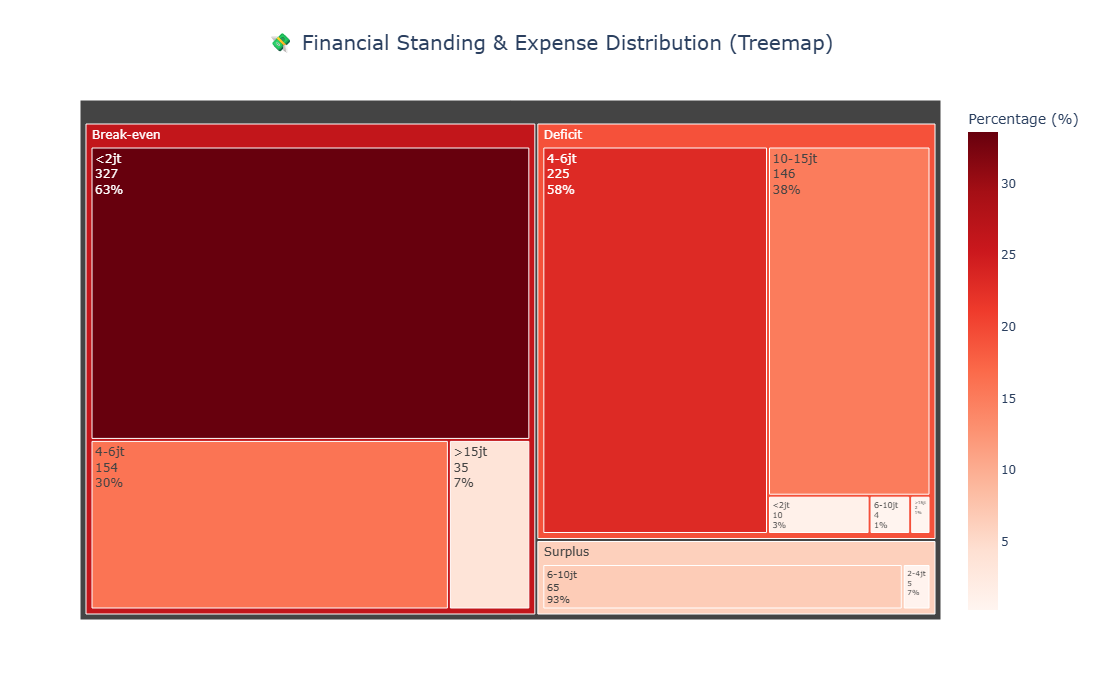


✅ Expense-focused treemap created!
💡 Compare this with income treemap to spot patterns.


In [32]:
# Alternative: Expense-focused treemap
treemap_expense = df.groupby(['financial_standing', 'avg_expense_category']).size().reset_index(name='count')
treemap_expense['percentage'] = (treemap_expense['count'] / treemap_expense['count'].sum() * 100).round(2)

fig = px.treemap(
    treemap_expense,
    path=['financial_standing', 'avg_expense_category'],
    values='count',
    color='percentage',
    color_continuous_scale='Reds',
    title='💸 Financial Standing & Expense Distribution (Treemap)',
    hover_data={'count': True, 'percentage': ':.2f'}
)

fig.update_layout(
    title_x=0.5,
    title_font_size=20,
    height=700,
    coloraxis_colorbar=dict(title="Percentage (%)")
)

fig.update_traces(
    textinfo="label+value+percent parent",
    textfont_size=12
)

fig.show()

print("\n✅ Expense-focused treemap created!")
print("💡 Compare this with income treemap to spot patterns.")

### 4.4 Bonus Alternative: Scatter Plot with Bubble Size

**Why Use This:**
- Shows actual numerical values (not just categories)
- Bubble size = count of people
- Can add financial standing as color
- Great for spotting outliers and trends

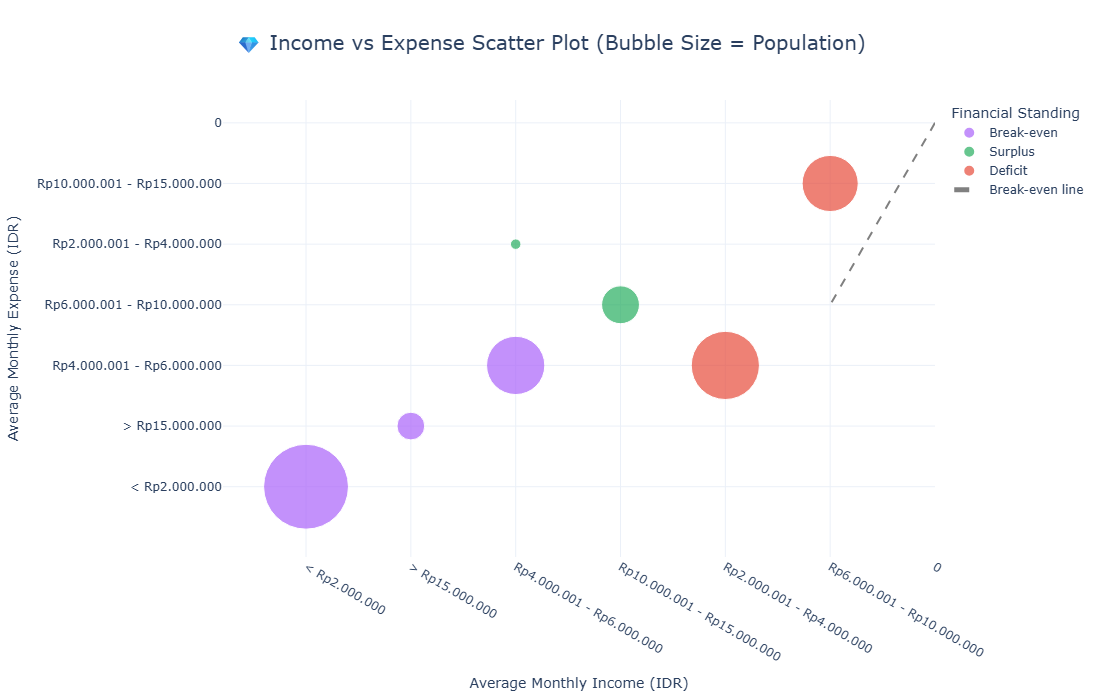


✅ Scatter plot created successfully!

💡 Interpretation:
   - Points ABOVE diagonal = Spending more than earning (Deficit)
   - Points ON diagonal = Balanced budget
   - Points BELOW diagonal = Earning more than spending (Surplus)
   - Larger bubbles = more people in that income-expense combination


In [33]:
# Aggregate data for scatter plot
scatter_data = df.groupby(['avg_monthly_income', 'avg_monthly_expense', 'financial_standing']).size().reset_index(name='count')

# Create scatter plot
fig = px.scatter(
    scatter_data,
    x='avg_monthly_income',
    y='avg_monthly_expense',
    size='count',
    color='financial_standing',
    title='💎 Income vs Expense Scatter Plot (Bubble Size = Population)',
    labels={
        'avg_monthly_income': 'Average Monthly Income (IDR)',
        'avg_monthly_expense': 'Average Monthly Expense (IDR)',
        'count': 'Number of People'
    },
    color_discrete_map={
        'Surplus': '#27ae60',
        'Balance': '#f39c12', 
        'Deficit': '#e74c3c'
    },
    size_max=60,
    hover_data={'count': True}
)

# Add diagonal line (expense = income)
max_val = max(scatter_data['avg_monthly_income'].max(), scatter_data['avg_monthly_expense'].max())
fig.add_trace(go.Scatter(
    x=[0, max_val],
    y=[0, max_val],
    mode='lines',
    name='Break-even line',
    line=dict(dash='dash', color='gray', width=2),
    showlegend=True
))

fig.update_layout(
    title_x=0.5,
    title_font_size=20,
    height=700,
    template='plotly_white',
    legend=dict(title='Financial Standing')
)

fig.show()

print("\n✅ Scatter plot created successfully!")
print("\n💡 Interpretation:")
print("   - Points ABOVE diagonal = Spending more than earning (Deficit)")
print("   - Points ON diagonal = Balanced budget")
print("   - Points BELOW diagonal = Earning more than spending (Surplus)")
print("   - Larger bubbles = more people in that income-expense combination")

---
## 5. Summary & Next Steps <a id='summary'></a>

### 🎯 What We've Accomplished

✅ **Environment Setup**: Installed and configured all required libraries

✅ **Data Exploration**: Loaded and thoroughly analyzed the GenZ financial dataset

✅ **Primary Visualizations**: Created 3 versions of income vs expense comparison:
   - Grouped bar chart (side-by-side)
   - Stacked bar chart (combined)
   - Diverging bar chart (mirrored)

✅ **Alternative Visualizations**: Explored 4 different approaches:
   1. Sankey diagram (flow visualization)
   2. Heatmap (cross-category density)
   3. Treemap (hierarchical proportions)
   4. Scatter plot (numerical relationship)

### 🚀 Competition Strategy Tips

1. **Choose 2-3 visualizations** that tell a cohesive story
2. **Lead with insights**, not just charts
3. **Use interactive visualizations** (Plotly) to impress judges
4. **Add annotations** to highlight key findings
5. **Consider your audience** - make it accessible but insightful

### 📊 Recommended Dashboard Layout

**Top Section:** KPI cards showing:
- Total respondents
- % in Surplus/Deficit/Balance
- Most common income/expense categories

**Middle Section:** Primary visualization (grouped bar chart)

**Bottom Section:** Choose 2 alternatives:
- Heatmap (shows patterns)
- Sankey or Scatter (shows relationships)

### 🔧 Next Steps for Full Dashboard

1. **Integrate additional columns** from the dataset
2. **Add filters/slicers** for interactivity
3. **Create a unified color scheme**
4. **Add storytelling text** between visualizations
5. **Export to HTML** for presentation: `fig.write_html('dashboard.html')`
6. **Consider using Dash/Streamlit** for full web dashboard

### 💡 Data Storytelling Angles

Consider building your narrative around one of these themes:
- "The GenZ Financial Reality: Where Income Meets Expense"
- "Beyond the Numbers: Understanding GenZ Spending Patterns"
- "Financial Health Check: Are GenZ Living Within Their Means?"
- "The Income-Expense Gap: A Visual Investigation"

### 📝 Your Action Items

1. ✏️ Run all cells and review each visualization
2. 📊 Choose which visualizations best tell YOUR story
3. 🎨 Customize colors/styling to match your presentation theme
4. 📄 Add analysis text explaining what each chart reveals
5. 🚀 Expand with additional data columns from the dataset
6. 💬 Practice explaining insights to others

---

**Good luck with your competition! 🏆**

Remember: Judges value **insights over complexity**. A simple, well-explained visualization beats a complex, confusing one every time.

In [34]:
# Export this notebook as HTML for sharing
# Run this in terminal: jupyter nbconvert --to html genz_financial_dashboard_analysis.ipynb
print("\n📦 To export this notebook:")
print("Run in terminal: jupyter nbconvert --to html genz_financial_dashboard_analysis.ipynb")
print("\n✅ Setup complete! Ready to create winning visualizations! 🎉")


📦 To export this notebook:
Run in terminal: jupyter nbconvert --to html genz_financial_dashboard_analysis.ipynb

✅ Setup complete! Ready to create winning visualizations! 🎉
